In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/annas/Downloads/dataset.txt", sep="\t")
df.head(25)


,chr,pos,non_flipped_ref,non_flipped_alt,gene_name,change_position_1based,ref_aa,alt_aa,score_PAI3D,percentile_PAI3D,refseq,prediction,tunnel,tunnel_num,cofactor,prot_average,tunn_average,cofa_average
0,chr14,99684421,A,C,ENST00000261835.8,2,S,R,0.431751,0.248117,NM_006668.2,benign,0.0,NaN,0,0.556615,0.581896,0.639956
1,chr14,99684421,A,G,ENST00000261835.8,2,S,G,0.329813,0.118456,NM_006668.2,benign,0.0,NaN,0,0.556615,0.581896,0.639956
2,chr14,99684421,A,T,ENST00000261835.8,2,S,C,0.581880,0.466634,NM_006668.2,pathogenic,0.0,NaN,0,0.556615,0.581896,0.639956
3,chr14,99684422,G,A,ENST00000261835.8,2,S,N,0.475890,0.310082,NM_006668.2,benign,0.0,NaN,0,0.556615,0.581896,0.639956
4,chr14,99684422,G,C,ENST00000261835.8,2,S,T,0.399549,0.204700,NM_006668.2,benign,0.0,NaN,0,0.556615,0.581896,0.639956
5,chr14,99684422,G,T,ENST00000261835.8,2,S,I,0.555610,0.427005,NM_006668.2,pathogenic,0.0,NaN,0,0.556615,0.581896,0.639956
6,chr14,99684423,C,A,ENST00000261835.8,2,S,R,0.431751,0.248117,NM_006668.2,benign,0.0,NaN,0,0.556615,0.581896,0.639956
7,chr14,99684423,C,G,ENST00000261835.8,2,S,R,0.431751,0.248117,NM_006668.2,benign,0.0,NaN,0,0.556615,0.581896,0.639956
8,chr14,99684424,C,A,ENST00000261835.8,3,P,T,0.473122,0.306134,NM_006668.2,benign,0.0,NaN,0,0.556615,0.581896,0.639956
9,chr14,99684424,C,G,ENST00000261835.8,3,P,A,0.381212,0.180753,NM_006668.2,benign,0.0,NaN,0,0.556615,0.581896,0.639956


In [44]:
one_to_three = {
    "A": "ALA",
    "R": "ARG",
    "N": "ASN",
    "D": "ASP",
    "C": "CYS",
    "Q": "GLN",
    "E": "GLU",
    "G": "GLY",
    "H": "HIS",
    "I": "ILE",
    "L": "LEU",
    "K": "LYS",
    "M": "MET",
    "F": "PHE",
    "P": "PRO",
    "S": "SER",
    "T": "THR",
    "W": "TRP",
    "Y": "TYR",
    "V": "VAL"
}

aa_order = ['HIS', 'TYR', 'TRP', 'ARG', 'ASN', 'PHE', 'ASP', 'THR', 'MET', 'SER', 'LYS', 'GLN', 'GLU', 'CYS', 'PRO', 'GLY', 'ILE', 'LEU', 'ALA', 'VAL']



In [45]:
import pandas as pd

# Předpokládejme, že máš svůj dataframe jménem df
# Zaokrouhlení hodnot patogenity na dvě desetinná místa
df['rounded_score'] = df['score_PAI3D'].round(2)

# Vytvoření kontingenční tabulky (pivot table)
aa_counts = pd.pivot_table(
    df,
    index='rounded_score',
    columns='ref_aa',
    aggfunc='size',  # počet výskytů
    fill_value=0  # pokud kombinace neexistuje, bude tam 0
)

# Setřídění podle score
aa_counts = aa_counts.sort_index(ascending=False)
aa_counts_renamed = aa_counts.rename(columns=one_to_three)
ordered_columns = [aa for aa in aa_order if aa in aa_counts_renamed.columns]
aa_counts_ordered = aa_counts_renamed[ordered_columns]
# Zobrazíme výsledný dataframe
print(aa_counts_ordered)

ref_aa         HIS  TYR  TRP  ARG  ASN  PHE  ASP  THR  MET  SER  LYS  GLN  \
rounded_score                                                               
0.98             0    0    0    0    0    0    0    0    0    0    0    0   
0.97             1    0    0    2    0    0    0    6    0    1    0    0   
0.96             0    3    0    3    0    0    0    5    2    0    0    1   
0.95             2    0    2    3    0    0    0   10    3    4    0    0   
0.94             2    5    2    8    0    0    0   15    5    4    0    0   
...            ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
0.13             4    1    2    2    2    0   13    4   10    3    2    4   
0.12             1    0    2    2    3    4    1    4    2    3    0    1   
0.11             1    0    0    1    1    3    3    4    0    2    2    1   
0.10             1    0    0    0    0    0    0    2    2    0    1    0   
0.09             0    0    0    0    0    0    2    0    0    2    0    0   

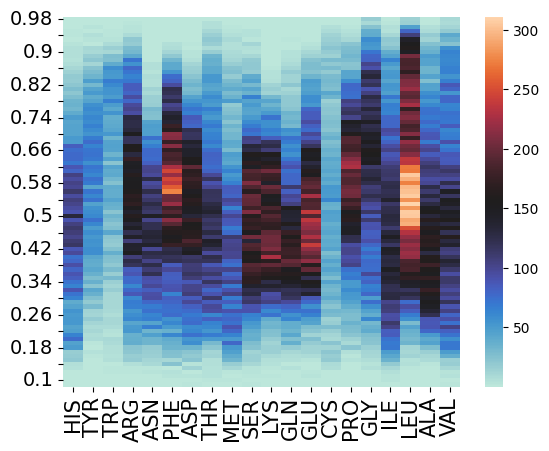

In [46]:
ax = sns.heatmap(aa_counts_ordered,vmin = 0.09, cmap = sns.color_palette("icefire", as_cmap=True))

yticks = ax.get_yticks()
yticklabels = ax.get_yticklabels()
new_labels = [label.get_text() if i % 2 == 0 else '' for i, label in enumerate(yticklabels)]


ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
#ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
ax.set_yticks(yticks)
ax.set_yticklabels(new_labels, fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('')

plt.show()

In [47]:


# Filtrování pouze řádků, kde tunnel == 0.1
filtered_df = df[df['tunnel'] == 1.0].copy()

# Zaokrouhlení hodnot patogenity
filtered_df['rounded_score'] = filtered_df['score_PAI3D'].round(2)

# Vytvoření kontingenční tabulky
aa_counts = pd.pivot_table(
    filtered_df,
    index='rounded_score',
    columns='ref_aa',
    aggfunc='size',
    fill_value=0
)

# Seřazení podle score sestupně
aa_counts = aa_counts.sort_index(ascending=False)
aa_counts_renamed = aa_counts.rename(columns=one_to_three)
ordered_columns = [aa for aa in aa_order if aa in aa_counts_renamed.columns]
aa_counts_ordered = aa_counts_renamed[ordered_columns]
# Zobrazíme výsledný dataframe
print(aa_counts_ordered)
# Výpis výsledku
#print(aa_counts)

ref_aa         HIS  TYR  TRP  ARG  ASN  PHE  ASP  THR  MET  SER  LYS  GLN  \
rounded_score                                                               
0.98             0    0    0    0    0    0    0    0    0    0    0    0   
0.97             0    0    0    0    0    0    0    0    0    0    0    0   
0.96             0    1    0    0    0    0    0    1    0    0    0    0   
0.95             0    0    0    1    0    0    0    5    0    0    0    0   
0.94             0    2    0    1    0    0    0    8    0    0    0    0   
...            ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
0.15             0    0    0    1    2    1    0    0   20    1    0    0   
0.14             0    0    0    0    0    6    0    0    3    0    0    0   
0.13             0    0    0    0    0    0    0    0    2    0    0    0   
0.12             0    0    0    0    0    0    0    0    2    0    0    0   
0.10             0    0    0    0    0    0    0    0    0    0    0    0   

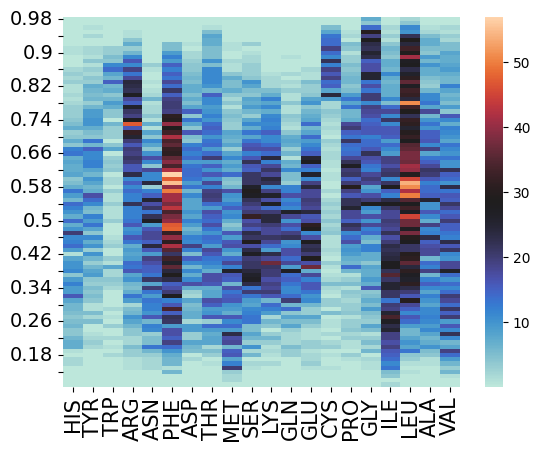

In [48]:
ax = sns.heatmap(aa_counts_ordered,vmin = 0.09, cmap = sns.color_palette("icefire", as_cmap=True))

yticks = ax.get_yticks()
yticklabels = ax.get_yticklabels()
new_labels = [label.get_text() if i % 2 == 0 else '' for i, label in enumerate(yticklabels)]


ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
#ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
ax.set_yticks(yticks)
ax.set_yticklabels(new_labels, fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('')

plt.show()

In [49]:


# Filtrování pouze řádků, kde tunnel == 0.1
filtered_df = df[df['cofactor'] == 1].copy()

# Zaokrouhlení hodnot patogenity
filtered_df['rounded_score'] = filtered_df['score_PAI3D'].round(2)

# Vytvoření kontingenční tabulky
aa_counts = pd.pivot_table(
    filtered_df,
    index='rounded_score',
    columns='ref_aa',
    aggfunc='size',
    fill_value=0
)

# Seřazení podle score sestupně
aa_counts = aa_counts.sort_index(ascending=False)

aa_counts_renamed = aa_counts.rename(columns=one_to_three)
ordered_columns = [aa for aa in aa_order if aa in aa_counts_renamed.columns]
aa_counts_ordered = aa_counts_renamed[ordered_columns]
# Zobrazíme výsledný dataframe
print(aa_counts_ordered)
# Výpis výsledku


ref_aa         HIS  TYR  TRP  ARG  ASN  PHE  ASP  THR  MET  SER  LYS  GLN  \
rounded_score                                                               
0.98             0    0    0    0    0    0    0    0    0    0    0    0   
0.97             0    0    0    1    0    0    0    0    0    0    0    0   
0.96             0    1    0    1    0    0    0    1    0    0    0    0   
0.95             0    0    0    0    0    0    0    5    0    0    0    0   
0.94             0    1    0    2    0    0    0    7    0    0    0    0   
...            ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
0.18             0    0    0    0    0    5    0    0    1    0    0    0   
0.17             0    0    0    0    0    5    0    0    0    0    0    0   
0.16             0    0    0    0    0    3    0    0    0    0    0    0   
0.15             0    0    0    0    0    0    0    0    3    0    0    0   
0.14             0    0    0    0    0    0    0    0    1    0    0    0   

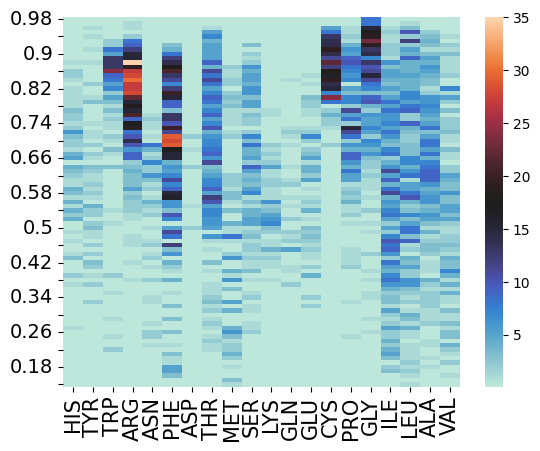

In [50]:
ax = sns.heatmap(aa_counts_ordered,vmin = 0.09, cmap = sns.color_palette("icefire", as_cmap=True))

yticks = ax.get_yticks()
yticklabels = ax.get_yticklabels()
new_labels = [label.get_text() if i % 2 == 0 else '' for i, label in enumerate(yticklabels)]


ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
#ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
ax.set_yticks(yticks)
ax.set_yticklabels(new_labels, fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('')

plt.show()